# Desafio Cientista de Dados

## Introdução

Olá candidato(a), o objetivo deste desafio é testar os seus conhecimentos sobre a resolução de problemas de negócios, análise de dados e aplicação de modelos preditivos. Queremos testar seus conhecimentos dos conceitos estatísticos de modelos preditivos, criatividade na resolução de problemas e aplicação de modelos básicos de machine learning.  É importante deixar claro que não existe resposta certa e que o que nos interessa é sua capacidade de descrever e justificar os passos utilizados na resolução do problema.

### Desafio

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma **análise exploratória dos dados** de seu maior concorrente, assim como um **teste de validação de um modelo preditivo**.

Seu objetivo é desenvolver um **modelo de previsão de preços** a partir do dataset oferecido, e **avaliar** tal modelo utilizando as **métricas de avaliação que mais fazem sentido para o problema**. O uso de **outras fontes de dados** além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos dados.

### Entregas

1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. **Seja criativo!**

2. Responda também às seguintes perguntas:
    - Supondo que uma pessoa esteja pensando em investir em um **apartamento para alugar** na plataforma, **onde seria mais indicada a compra**?
    - O **número mínimo de noites** e a **disponibilidade** ao longo do ano **interferem no preço**?
    - Existe algum **padrão no texto do nome do local** para **lugares de mais alto valor**?

3. Explique **como você faria a previsão do preço a partir dos dados**. Quais **variáveis** e/ou suas **transformações** você utilizou e **por quê**? Qual **tipo de problema** estamos resolvendo (regressão, classificação)? Qual **modelo melhor se aproxima dos dados** e quais seus **prós e contras**? Qual **medida de performance** do modelo foi **escolhida** e **por quê**?

4. Supondo um apartamento com as seguintes características, **qual seria a sua sugestão de preço**?:

        {'id': 2595,
        'nome': 'Skylit Midtown Castle',
        'host_id': 2845,
        'host_name': 'Jennifer',
        'bairro_group': 'Manhattan',
        'bairro': 'Midtown',
        'latitude': 40.75362,
        'longitude': -73.98377,
        'room_type': 'Entire home/apt',
        'minimo_noites': 1,
        'numero_de_reviews': 45,
        'ultima_review': '2019-05-21',
        'reviews_por_mes': 0.38,
        'calculado_host_listings_count': 2,
        'disponibilidade_365': 355}

5. **Salve o modelo desenvolvido** no formato .pkl. 

6. A entrega deve ser feita através de um *repositório de código público* que contenha:
    - README explicando como instalar e executar o projeto
    - Arquivo de requisitos com todos os pacotes utilizados e suas versões
    - Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
    - Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
    - Arquivo .pkl conforme passo 5 acima.

7. Um vídeo curto explicando o desenvolvimento de suas entregas deste desafio, como você planejou e executou as atividades propostas. O vídeo deverá ser entregue via link via Google Drive. Lembre-se de autorizar o acesso para "qualquer pessoa com o link".

Todos os códigos produzidos devem seguir as boas práticas de codificação.

### Prazo

Você tem até 7 dias corridos para a entrega, contados a partir do recebimento deste desafio. O não cumprimento deste prazo implica na desclassificação do processo seletivo.
A Indicium possui ferramentas avançadas de detecção de plágio e inteligência artificial. A utilização de IA implica na desclassificação do processo seletivo.

Envie o seu relatório dentro da sua data limite para o email: **selecao.lighthouse@indicium.tech**

O arquivo de entrega deve ser nomeado como: **LH_CD_SEUNOME**

Bom trabalho!

## Dicionário dos dados

A base de dados de treinamento contém 16 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

- id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
- nome - Representa o nome do anúncio
- host_id - Representa o id do usuário que hospedou o anúncio
- host_name – Contém o nome do usuário que hospedou o anúncio
- bairro_group - Contém o nome do bairro onde o anúncio está localizado (Burgo)
- bairro - Contém o nome da área onde o anúncio está localizado (Bairro)
- latitude - Contém a latitude do local
- longitude - Contém a longitude do local
- room_type – Contém o tipo de espaço de cada anúncio
- price - Contém o preço por noite em dólares listado pelo anfitrião
- minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
- numero_de_reviews - Contém o número de comentários dados a cada listagem
- ultima_review - Contém a data da última revisão dada à listagem
- reviews_por_mes - Contém o número de avaliações fornecidas por mês
- calculado_host_listings_count - Contém a quantidade de listagem por host
- disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

# Desafio:

### Imports

In [1]:
# Ánalise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ferramentas de ML
from sklearn.model_selection import train_test_split
import joblib
import mlflow
import mlflow.sklearn
import logging

# Modelos de regressão
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost
from xgboost import XGBRegressor

# Avaliação
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

### Análise inicial do dataset

In [2]:
df = pd.read_csv('teste_indicium_precificacao.csv')

df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [3]:
df.isna().any()

id                               False
nome                              True
host_id                          False
host_name                         True
bairro_group                     False
bairro                           False
latitude                         False
longitude                        False
room_type                        False
price                            False
minimo_noites                    False
numero_de_reviews                False
ultima_review                     True
reviews_por_mes                   True
calculado_host_listings_count    False
disponibilidade_365              False
dtype: bool

In [4]:
df.drop(columns=['id','host_id']).describe() # os ids não são úteis aqui 

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# testar se as instâncias nulas de ultima_review tbm possuem reviews_por_mes nulas
print((df['ultima_review'].isna() | df['reviews_por_mes'].isna()).sum() == (df['ultima_review'].isna() & df['reviews_por_mes'].isna()).sum())

# verificar se todas as instâncias que não possuem nenhuma review são 
# exatamente as mesmas que possuem ultima_review e reviews_por_mes
((df['numero_de_reviews']==0) == (df['ultima_review'].isna() & df['reviews_por_mes'].isna())).all()

True


True

Logo, todas as instâncias sem reviews possuem os atributos ```ultima_review = NaN``` e ```reviews_por_mes = NaN```.

### Novo dataset


Identifiquei que este dataset é um dataset de com informações de aluguéis pelo airbnb em Nova York até 2019. Como os dados são abertos para coleta pelo site [Inside Airbnb](https://insideairbnb.com), decidi coletar dados atualizados para análise. Este dataset extra foi compartilhado em 4 de Novembro de 2024 e está disponível para download em https://insideairbnb.com/get-the-data/.

In [6]:
df_new = pd.read_csv('listings.csv')

df_new.rename(columns={'name': 'nome', 
                       'neighbourhood_group': 'bairro_group', 
                       'neighbourhood': 'bairro',
                       'minimum_nights': 'minimo_noites',
                       'calculated_host_listings_count': 'calculado_host_listings_count',
                       'availability_365': 'disponibilidade_365',
                       'number_of_reviews': 'numero_de_reviews',
                       'last_review': 'ultima_review',
                       'reviews_per_month': 'reviews_por_mes'}, inplace=True) # trocando nomes das colunas para o merge

# retirando instâncias com o preço de aluguel faltando
# e colunas extras que não se encaixavam
df_new = df_new.drop(index=df_new[df_new['price'].isna()].index, columns=['license', 'number_of_reviews_ltm'])

df_new.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,0.27,3,365
1,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,83.0,30,195,2024-10-05,1.04,1,185
2,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,2022-06-05,0.03,2,83
3,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,71.0,30,250,2024-10-31,1.37,1,284
5,7097,"Perfect for Your Parents, With Garden & Patio",17571,Jane,Brooklyn,Fort Greene,40.69194,-73.97389,Private room,205.0,2,390,2024-10-27,2.16,2,215


In [7]:
df_new.isna().any()

id                               False
nome                             False
host_id                          False
host_name                        False
bairro_group                     False
bairro                           False
latitude                         False
longitude                        False
room_type                        False
price                            False
minimo_noites                    False
numero_de_reviews                False
ultima_review                     True
reviews_por_mes                   True
calculado_host_listings_count    False
disponibilidade_365              False
dtype: bool

In [8]:
DOUBLE = len(pd.merge(df, df_new, how='inner', left_on='id', right_on='id'))
print(len(df_new)-DOUBLE, DOUBLE)

18639 4102


Com isso, poderei adicionar 18639 instâncias novas e atualizar 4102 instâncias já existentes.

In [9]:
teste = pd.merge(df, df_new, how='inner', left_on='id', right_on='id')

In [10]:
# verificando se houve "desatualização" de informações das reviews do dataset antigo para o novo
ult_mask = teste['ultima_review_x'].notna() & teste['ultima_review_y'].isna()
rpm_mask = teste['reviews_por_mes_x'].notna() & teste['reviews_por_mes_y'].isna()

if(ult_mask.sum().any()):
    print(teste[ult_mask].index)
if(rpm_mask.any()):
    print(teste[rpm_mask].index)

teste.loc[ult_mask | rpm_mask, 
          ['id', 'numero_de_reviews_x', 'numero_de_reviews_y', 'ultima_review_x', 'ultima_review_y', 'reviews_por_mes_x', 'reviews_por_mes_y']].head()

Index([389, 486, 2239, 3052], dtype='int64')
Index([389, 486, 2239, 3052], dtype='int64')


,id,numero_de_reviews_x,numero_de_reviews_y,ultima_review_x,ultima_review_y,reviews_por_mes_x,reviews_por_mes_y
389,887355,1,0,2015-03-25,NaN,0.02,NaN
486,1291020,1,0,2019-06-19,NaN,1.00,NaN
2239,17974244,1,0,2018-05-12,NaN,0.07,NaN
3052,25904988,1,0,2018-07-21,NaN,0.08,NaN


Preciso ter cuidado apenas para não "desatualizar" a data da última review. Já com a quantidade de reviews por mês, faria mais sentido mudar os valores nulos desses casos para 0, já que suas última review foram a tanto tempo atrás, que o número de reviews por mes deve ter chegado a 0, sendo registrado como um valor nulo.

In [11]:
lost_reviews = teste.loc[ult_mask, ['id', 'ultima_review_x', 'reviews_por_mes_y']].set_index('id')
lost_reviews.columns = ['ultima_review', 'reviews_por_mes']
lost_reviews

,ultima_review,reviews_por_mes
id,,
887355,2015-03-25,NaN
1291020,2019-06-19,NaN
17974244,2018-05-12,NaN
25904988,2018-07-21,NaN


In [12]:
# Verificar se há id's repetidos antes de juntar os dataframes 
print((df['id'].value_counts() > 1).any())
(df_new['id'].value_counts() > 1).any()

False


False

In [13]:
df_old = df # apenas caso precise em testes futuros
df.set_index('id', inplace=True)
df_new.set_index('id', inplace=True)

# atualiza os dados antigos
df.update(df_new) 

# adiciona os novos dados e retira os usados na atualização
df = pd.concat([df, df_new.drop(index=lost_reviews.index)]) 
# se não tirar aquelas reviews "perdidas", elas não vão ser consideradas duplicatas a serem retiradas

df.reset_index(inplace=True)  # to recover the initial structure
df = df.drop_duplicates() # tira duplicatas

df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle Sanctuary,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,240.0,30,49,2022-06-21,0.27,3,365
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809020,-73.941900,Private room,150.0,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685140,-73.959760,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.798510,-73.943990,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.747670,-73.975000,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71626,1281096465598617765,"Furnished room in Bensonhurst, only for girls #23",3223938,Eugene,Brooklyn,Bensonhurst,40.612310,-73.980300,Private room,28.0,30,0,NaN,NaN,740,336
71627,1281230979116575465,Luxury Reno'd Designer Townhome,43042852,Joshua,Brooklyn,Bedford-Stuyvesant,40.684703,-73.957000,Entire home/apt,475.0,30,0,NaN,NaN,1,32
71628,1281263542832791722,Modern new 1 bed w/ rooftop,23297442,Amira,Brooklyn,Bedford-Stuyvesant,40.686559,-73.922157,Entire home/apt,162.0,30,0,NaN,NaN,1,124
71629,1281431427554747842,Beautiful 1 Bedroom Condo,530889967,Maria,Bronx,Port Morris,40.806013,-73.927053,Entire home/apt,250.0,30,0,NaN,NaN,1,364


## Análise dos dados

In [14]:
df.drop(columns=['id','host_id']).describe() # os ids não são úteis aqui 

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,67533.000000,67533.000000,67533.000000,67533.000000,67533.000000,51131.000000,67533.000000,67533.000000
mean,40.728715,-73.950113,173.767255,13.550842,25.373358,1.304219,30.125539,150.670265
std,0.055448,0.050398,297.956149,22.940821,54.918190,1.884584,125.944795,139.307766
min,40.499790,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.689230,-73.983400,70.000000,2.000000,1.000000,0.190000,1.000000,0.000000
50%,40.724110,-73.955400,120.000000,3.000000,5.000000,0.640000,1.000000,121.000000
75%,40.762910,-73.932540,199.000000,30.000000,24.000000,1.880000,3.000000,298.000000
max,40.913060,-73.713650,20000.000000,1250.000000,2165.000000,111.790000,897.000000,365.000000


Mapa de calor para indicação de correlações entre variáveis:

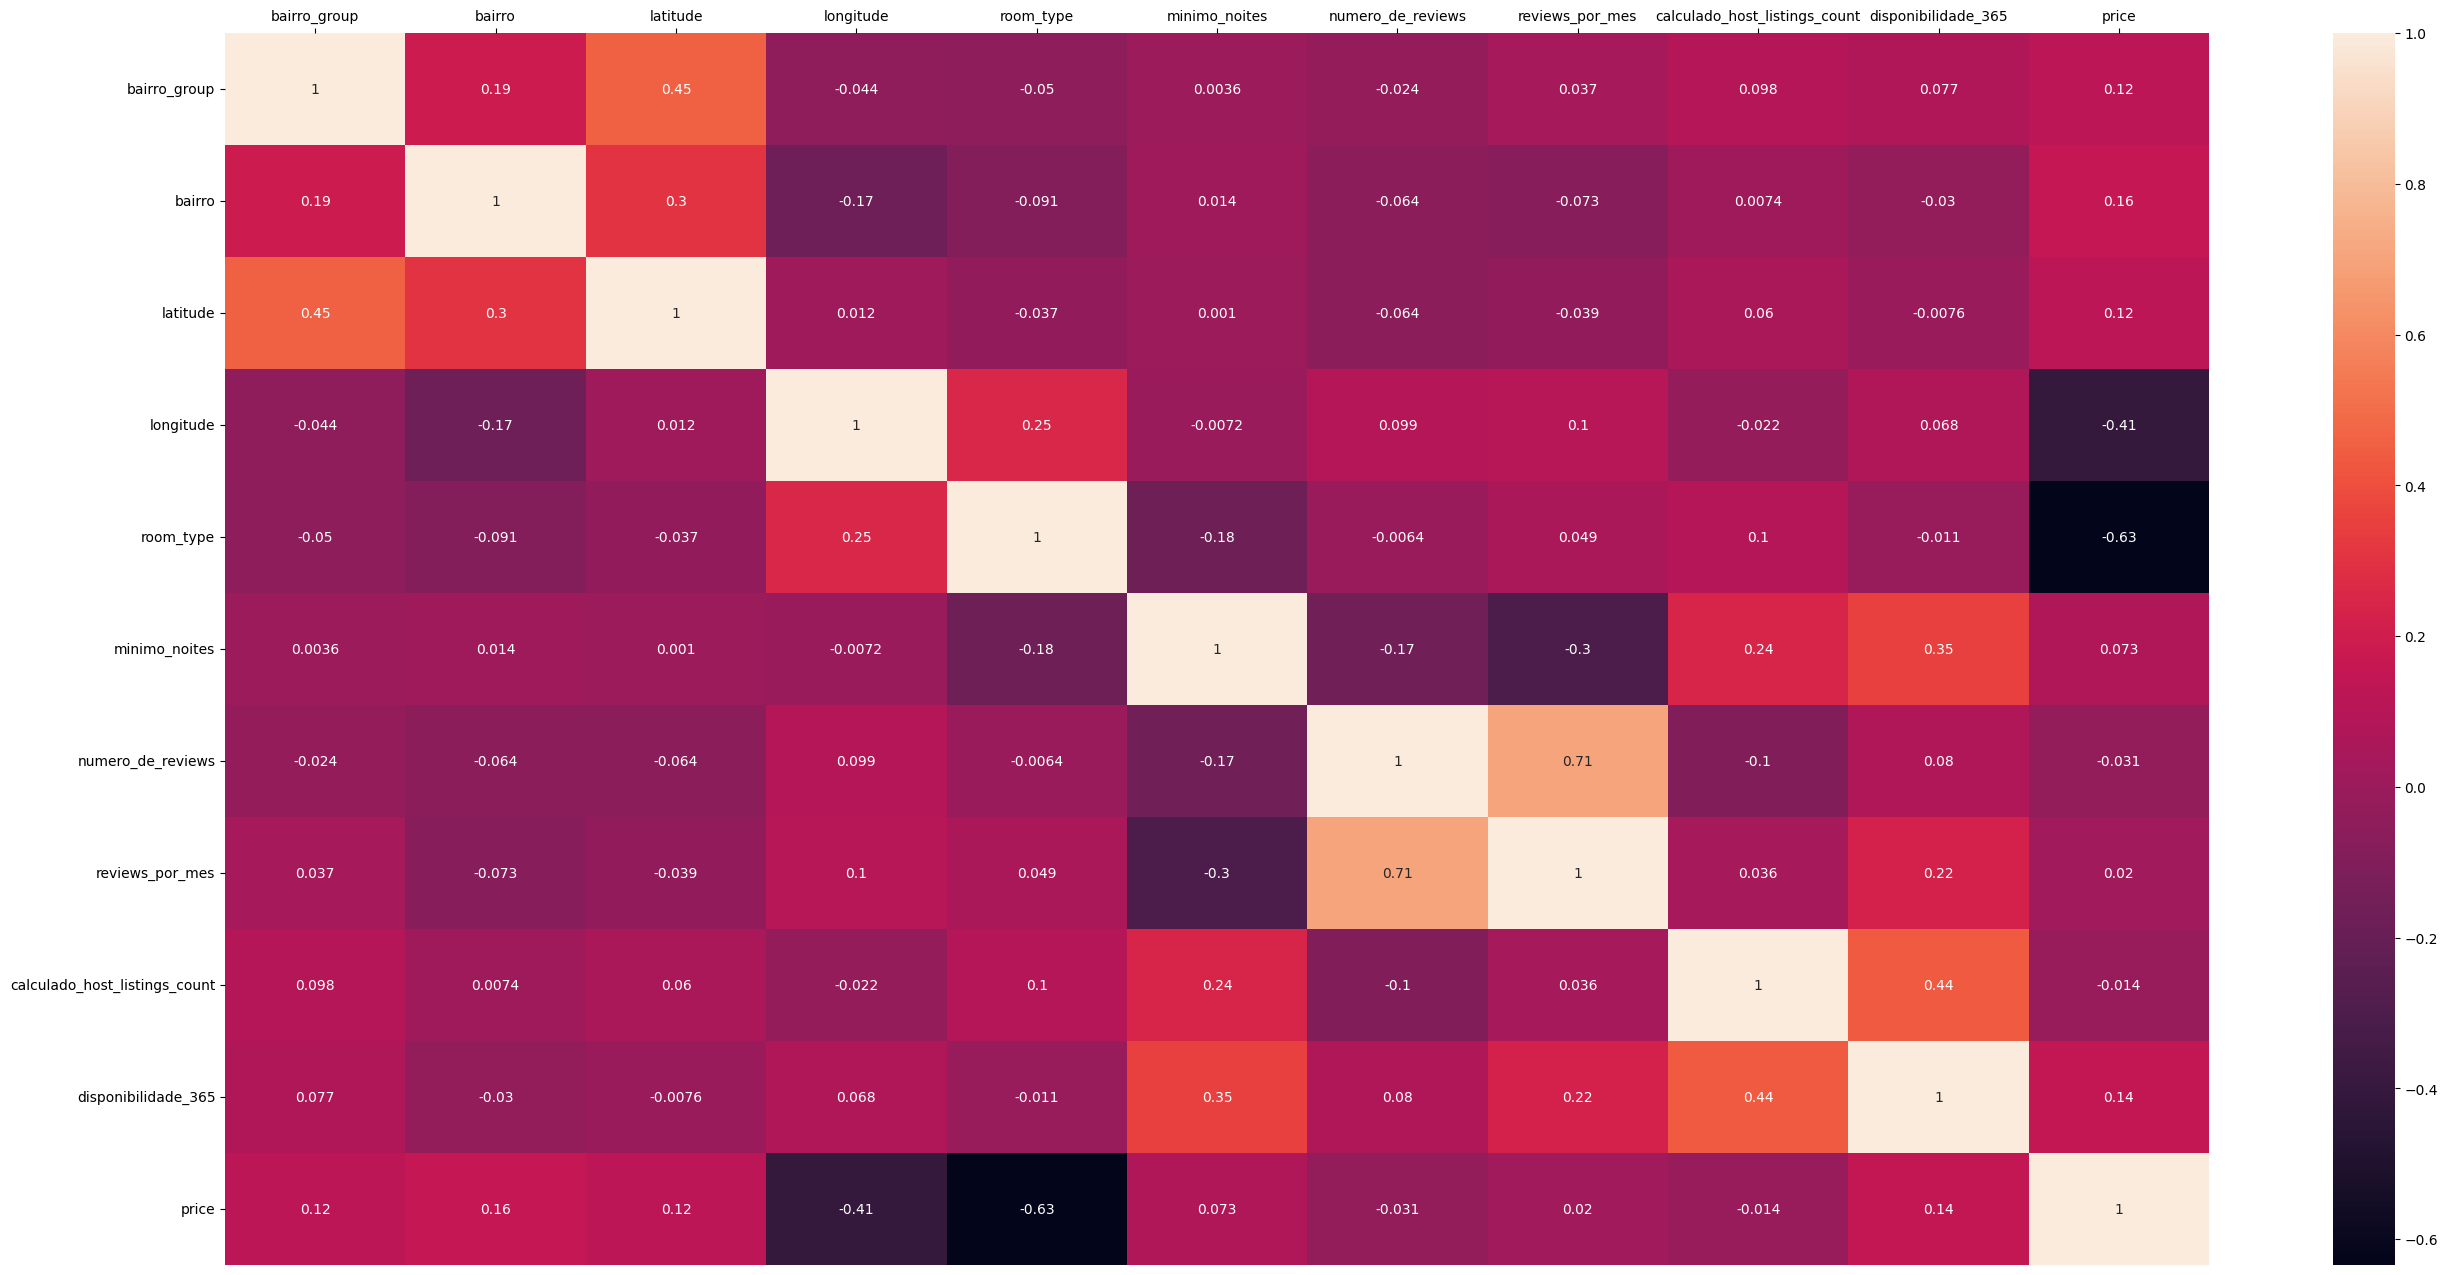

In [134]:
#cols = ['minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365', 'price']

df_corr = df.loc[:,['bairro_group', 'bairro', 'latitude', 'longitude', 'room_type', 'minimo_noites',
       'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365', 'price']]

# transformando em coluna categórica
df_corr['room_type'] = df_corr['room_type'].astype('category')
df_corr['bairro_group'] = df_corr['bairro_group'].astype('category')
bg_cats = df_corr['bairro_group'].cat.categories
df_corr['bairro'] = df_corr['bairro'].astype('category')

# transformando em números inteiros
df_corr['room_type'] = df_corr['room_type'].cat.codes
df_corr['bairro_group'] = df_corr['bairro_group'].cat.codes
df_corr['bairro'] = df_corr['bairro'].cat.codes

plt.figure(figsize=(32,16))
hm = sns.heatmap(df_corr.corr(method='spearman'), annot=True)
hm.set(xlabel="", ylabel="")
hm.xaxis.tick_top()
plt.show()

Com esse mapa de calor, podemos notar alguns níveis de correlação entre variáveis:
- room_type x price: Correlação moderada
- longitude x price: Correlação moderada
- reviews_por_mes x numero_de_reviews: Correlação forte
- bairro_group x latitude: Correlação moderada
- calculado_host_lastings_count x disponibilidade_365: Correlação moderada
- minimo_noites x disponibilidade_365: Correlação fraca

Alguns graus das correlações eram esperados, como latitude e bairro_group, já que os dois estão geograficamente ligados um ao outro, e a correlação entre room_type e price faz sentido, já que lugares mais espaçosos tendem a serem mais caros. 

Um caso curioso é que, apesar das correlações entre o preço e os burgos, bairros e latitude não serem relevantes (de acordo com o mapa), o atributo com que o preço possui maior correlação é a longitude, apesar da longitude ter bastante em comum com estes atributos.

### price

In [15]:
df['price'].describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

count    67533.000000
mean       173.767255
std        297.956149
min          0.000000
10%         50.000000
20%         65.000000
30%         80.000000
40%         99.000000
50%        120.000000
60%        149.000000
70%        175.000000
80%        225.000000
90%        316.000000
95%        438.000000
99%        949.680000
max      20000.000000
Name: price, dtype: float64

Mais de 99% das instâncias possuem um aluguel abaixo de $1000. Em menos de 1%, o valor dos aluguéis sobe de forma absurda, com o máximo valor sendo de $20000.

Assim, se tirarmos instâncias com aluguéis mais caros que $500 (2566 instâncias), conseguimos o seguinte histograma de preços:

In [15]:
len(df[df['price'] >= 500])

2566

array([[<Axes: title={'center': 'price'}>]], dtype=object)

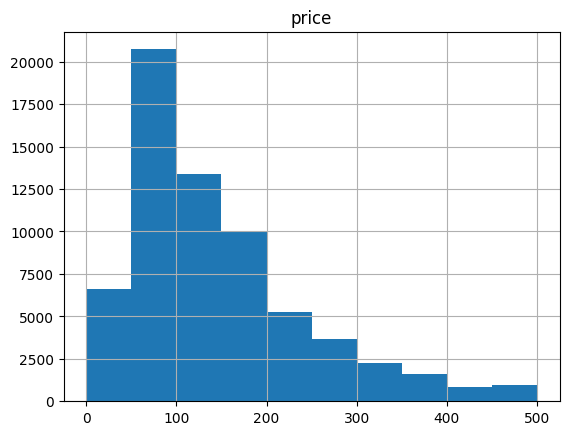

In [24]:
df.loc[df['price'] <= 500, ['price']].hist()

### nome x price

Nomes dos 10 locais mais baratos:

In [144]:
df.sort_values(by='price', ascending=True).loc[:,['nome','price']].head(10)

,nome,price
26258,the best you can find,0.0
23160,"Huge Brooklyn Brownstone Living, Close to it all.",0.0
26865,Best Coliving space ever! Shared room.,0.0
25432,★Hostel Style Room | Ideal Traveling Buddies★,0.0
25633,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",0.0
25752,"Sunny, Quiet Room in Greenpoint",0.0
25777,Modern apartment in the heart of Williamsburg,0.0
26840,Coliving in Brooklyn! Modern design / Shared room,0.0
25793,Spacious comfortable master bedroom with nice ...,0.0
25794,Contemporary bedroom in brownstone with nice view,0.0


Nomes dos 20 locais mais baratos:

In [143]:
df.sort_values(by='price', ascending=False).loc[:,['nome','price']].head(20)

,nome,price
64224,1-Bedroom Hotel Suite - 1 bed,20000.0
64225,2 Connecting Hotel Suites - 2 beds,20000.0
65957,Real Housewives Star NY Townhome,14097.0
57608,Lux Studio on Wall Street. Heart of Fidi!,10000.0
60262,Four Bedroom Penthouse,10000.0
62756,"Eighth House, State of the Art NYC Venue",10000.0
62759,North Gallery Café,10000.0
9150,Furnished room in Astoria apartment,10000.0
17691,Luxury 1 bedroom apt. -stunning Manhattan views,10000.0
29237,1-BR Lincoln Center,10000.0


Apesar de não ser nada claramente definido, os nomes dos locais mais caros tendem a ser mais profissionais, descrevendo o local brevemente, ou até mesmo mencionando o fato de ser um lugar de luxo, usando palavras como "luxury" ou "furnished".

Abaixo está também foi feito um teste para descobrir se havia um padrão mais concreto, separando cada palavra usada nos nomes de todos os imóveis, associando o preço do aluguel e tirando a média com as outras ocorrências da palavra:

In [146]:
names = df[['nome']].apply(lambda x: x.str.split())
names['price'] = df['price']
names = names[names['nome'].notna()]

words_array = [["".join(filter(str.isalnum, n)), names.loc[i,'price']] for i in names.index for n in names.loc[i,'nome']]
words_data = pd.DataFrame(np.array(words_array), columns=['nome', 'price'])
words_data['price'] = words_data['price'].astype(float)
words_data.groupby(by='nome').aggregate(['mean', 'median', 'count']).sort_values(by=[('price', 'median'), ('price', 'count')], ascending=False).head(30)

price               
                        mean   median count
nome                                       
Housewives           14097.0  14097.0     1
Connecting           11251.0  11251.0     2
flatTriBeCaSoho       8500.0   8500.0     1
FirehouseGreenpoint   7500.0   7500.0     1
MotorYacht            7500.0   7500.0     1
Eighth                6800.0   6800.0     2
daylight              6800.0   6800.0     1
10299B                5000.0   5000.0     1
11211                 5000.0   5000.0     1
50P                   5000.0   5000.0     1
Cap                   5000.0   5000.0     1
NearWilliamsburg      5000.0   5000.0     1
Panorama5             4645.0   4645.0     1
PenthouseTimes        4645.0   4645.0     1
AwayPenthouse         4503.0   4503.0     1
photo                 4150.0   4150.0     2
Penthouse5min         4129.0   4129.0     1
RockCity              4129.0   4129.0     1
ViewsAC               4129.0   4129.0     1
Vale                  4114.0   4114.0     1
8000sqft              4100.0   4100.0     1
BarEventFilming       4000.0   4000.0     1
Bdrs                  4000.0   4000.0     1
Otheroom              4000.0   4000.0     1
read                  4000.0   4000.0     1
Connect               3900.0   3900.0     1
Converge              3900.0   3900.0     1
Aboard                3750.0   3750.0     1
Anchor                3750.0   3750.0     1
Ventura               3750.0   3750.0     1

Não há nenhuma palavra, ou conjunto de palavras, específica para preços mais altos de aluguel.

### bairro_group (burgos) x price

In [14]:
df.loc[df['price']>=1000, ['bairro']].value_counts()

bairro         
Midtown            84
Upper West Side    48
Upper East Side    37
Tribeca            31
West Village       30
                   ..
Columbia St         1
City Island         1
Brighton Beach      1
Bayside             1
Woodside            1
Name: count, Length: 76, dtype: int64

Os 5 bairros com maior ocorrência de aluguéis de pelo menos $1000 são Midtown, Upper West Side, Upper East Side, Tribeca e West Village. Todos localizados em Manhattan.

In [15]:
df['bairro_group'].value_counts()

bairro_group
Manhattan        30087
Brooklyn         26374
Queens            8553
Bronx             1887
Staten Island      632
Name: count, dtype: int64

Manhattan é o burgo que possui o maior número de locais para aluguel, o que faz sentido, considerando que é o bairro mais turístico de Nova York. Seu alto fluxo de turistas também explica a alta dos preços do aluguel, já que turistas passam pouco tempo, e podem querer desfrutar de luxos que as vezes não têm em seu local de origem. 

Enquanto isso, burgos mais residenciais como Staten Island e Bronx não possuem tantos lugares para aluguel, quando comparado ao resto.

---

Como podemos ver no histograma abaixo, a maior parte da distribuição dos preços de aluguel se concentram por volta dos $100; abaixando muito ao chegar por volta da marca dos $50 e dos $1000:

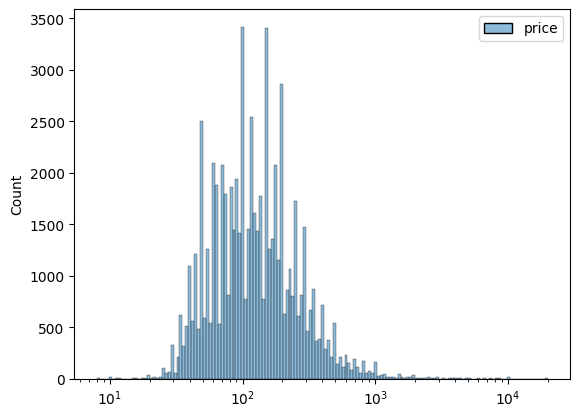

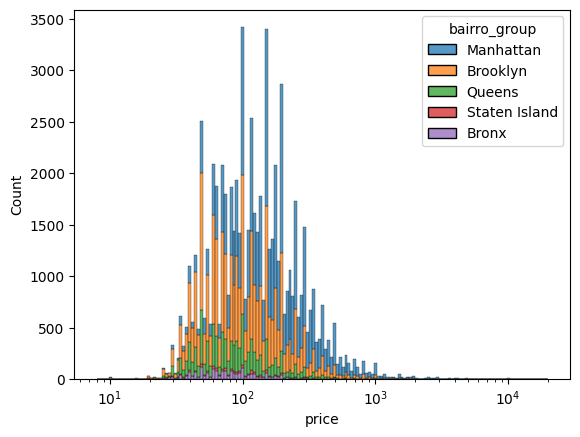

In [20]:
sns.histplot(df[['price']], log_scale=True)
plt.show()
sns.histplot(df,x='price', hue='bairro_group', log_scale=True, multiple='stack')
plt.show()

Com esse útlimo histograma, também podemos notar que os preços de aluguel em burgos como Bronx, Queens e Staten Island costumam custar mais barato do que nos outros burgos. 

O diagrama de caixa abaixo detalha melhor esta distribução de preços entre burgos:

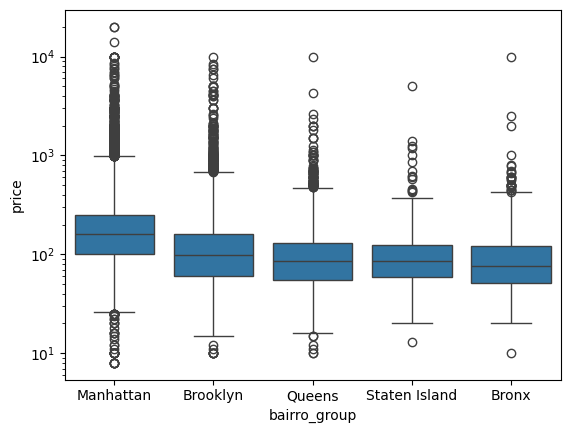

In [21]:
sns.boxplot(df,y='price', x='bairro_group', log_scale=True)
plt.show()

O diagrama mostra a diferença da distribuição dos preços de aluguéis entre burgos, assim mostrando a diferença na distribuição entre os burgos, com alguns deles possuindo alugueis mais baratos, mesmo que com alguns outliers.

In [14]:
df[['price','bairro_group']].groupby(by='bairro_group').aggregate(['median', 'mean', 'min', 'max'])

price                           
              median        mean   min      max
bairro_group                                   
Bronx           76.0  109.025967   0.0   9994.0
Brooklyn        99.0  138.284219   0.0  10000.0
Manhattan      159.0  227.187058   0.0  20000.0
Queens          85.0  113.380217  10.0  10000.0
Staten Island   85.5  121.939873  13.0   5000.0

Manhattan parece possuir custo de hospedagens maiores do que os outros burgos, enquanto o Bronx parece ser o menos custoso. (fazer mann-whitney)

Abaixo seguem os mapas de calor para todos os atributos, com base nas instâncias de cada burgo:

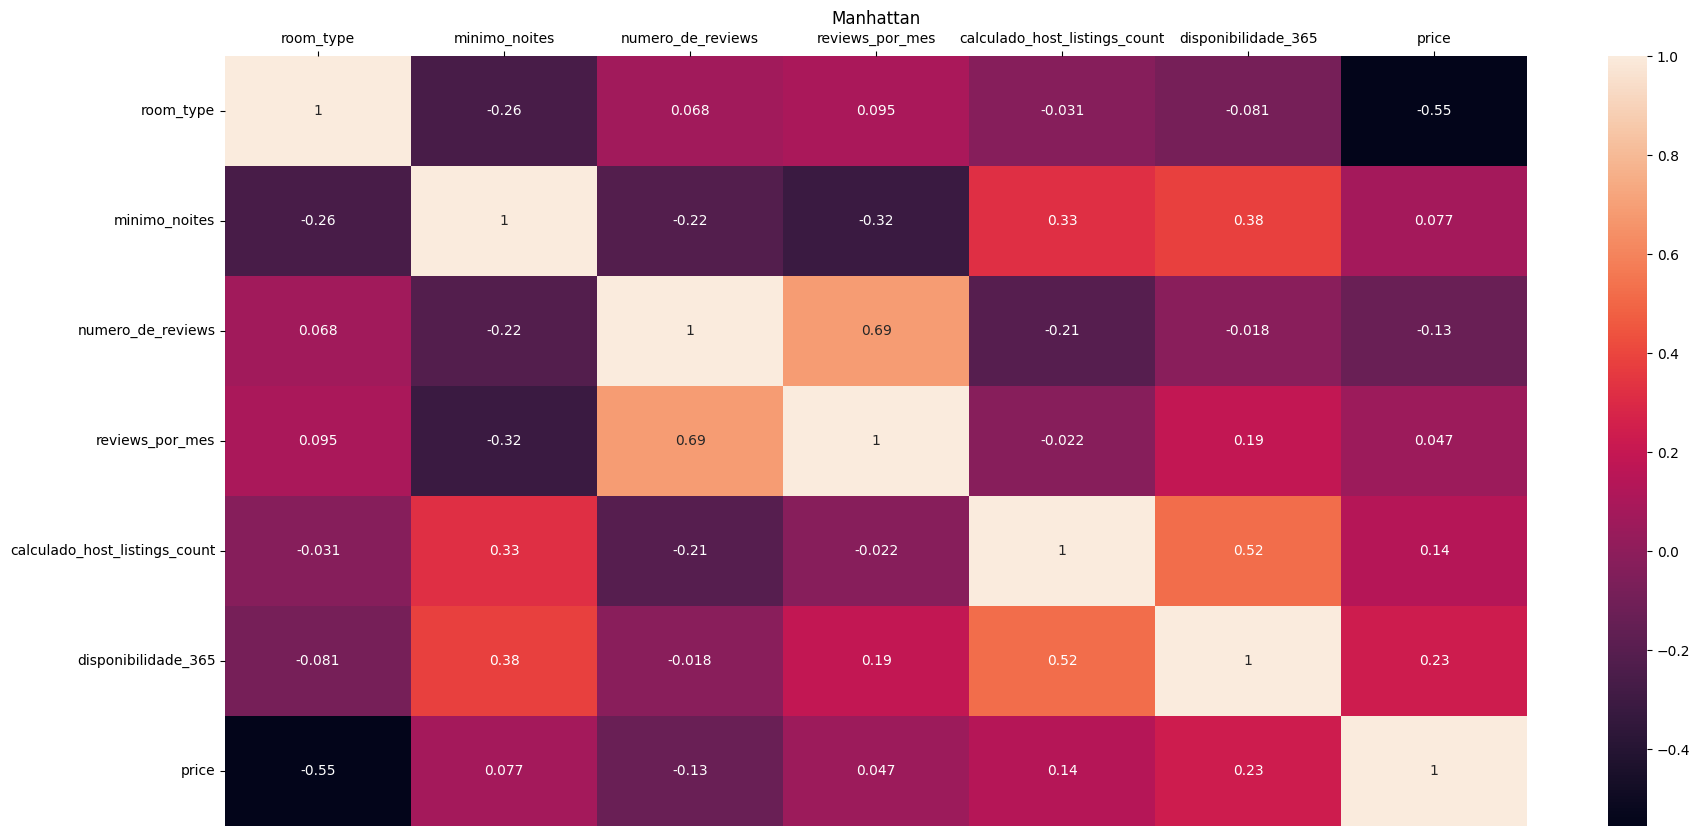

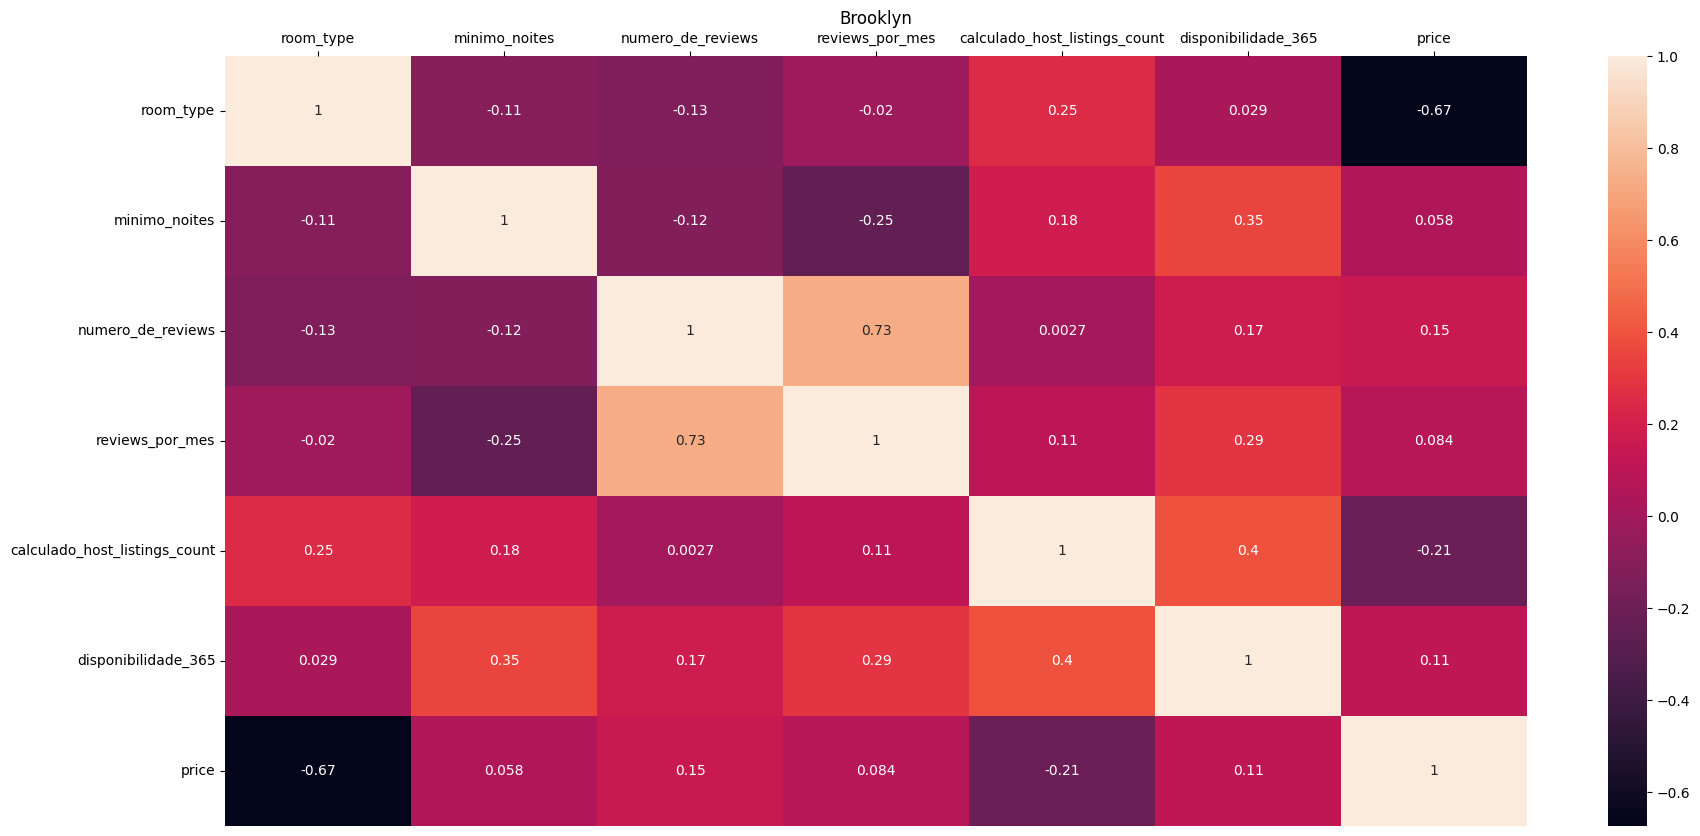

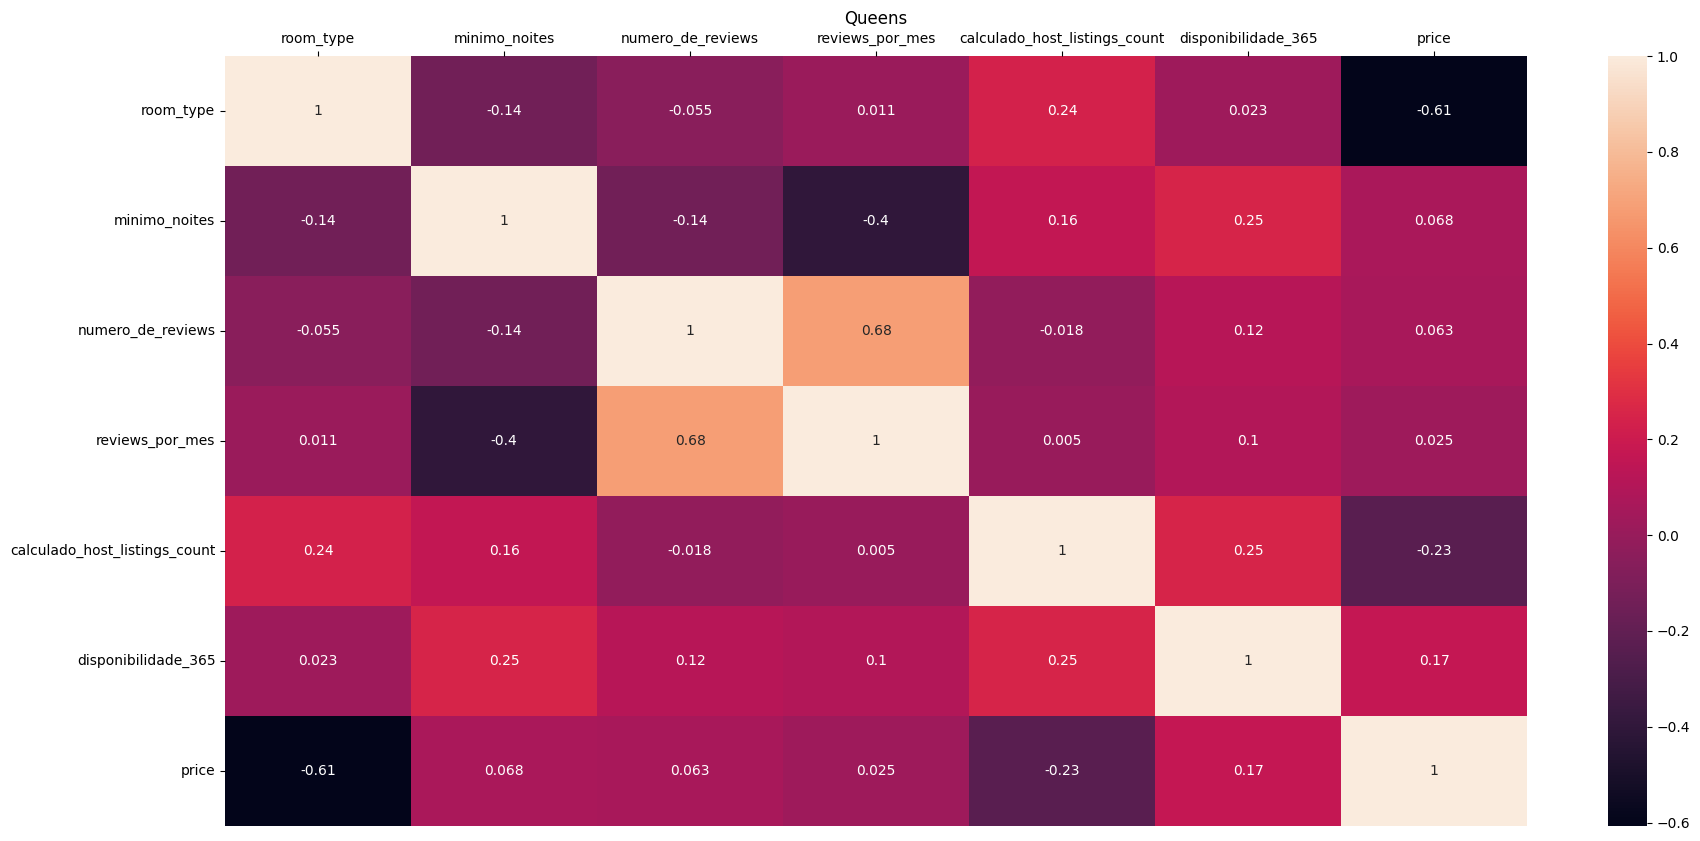

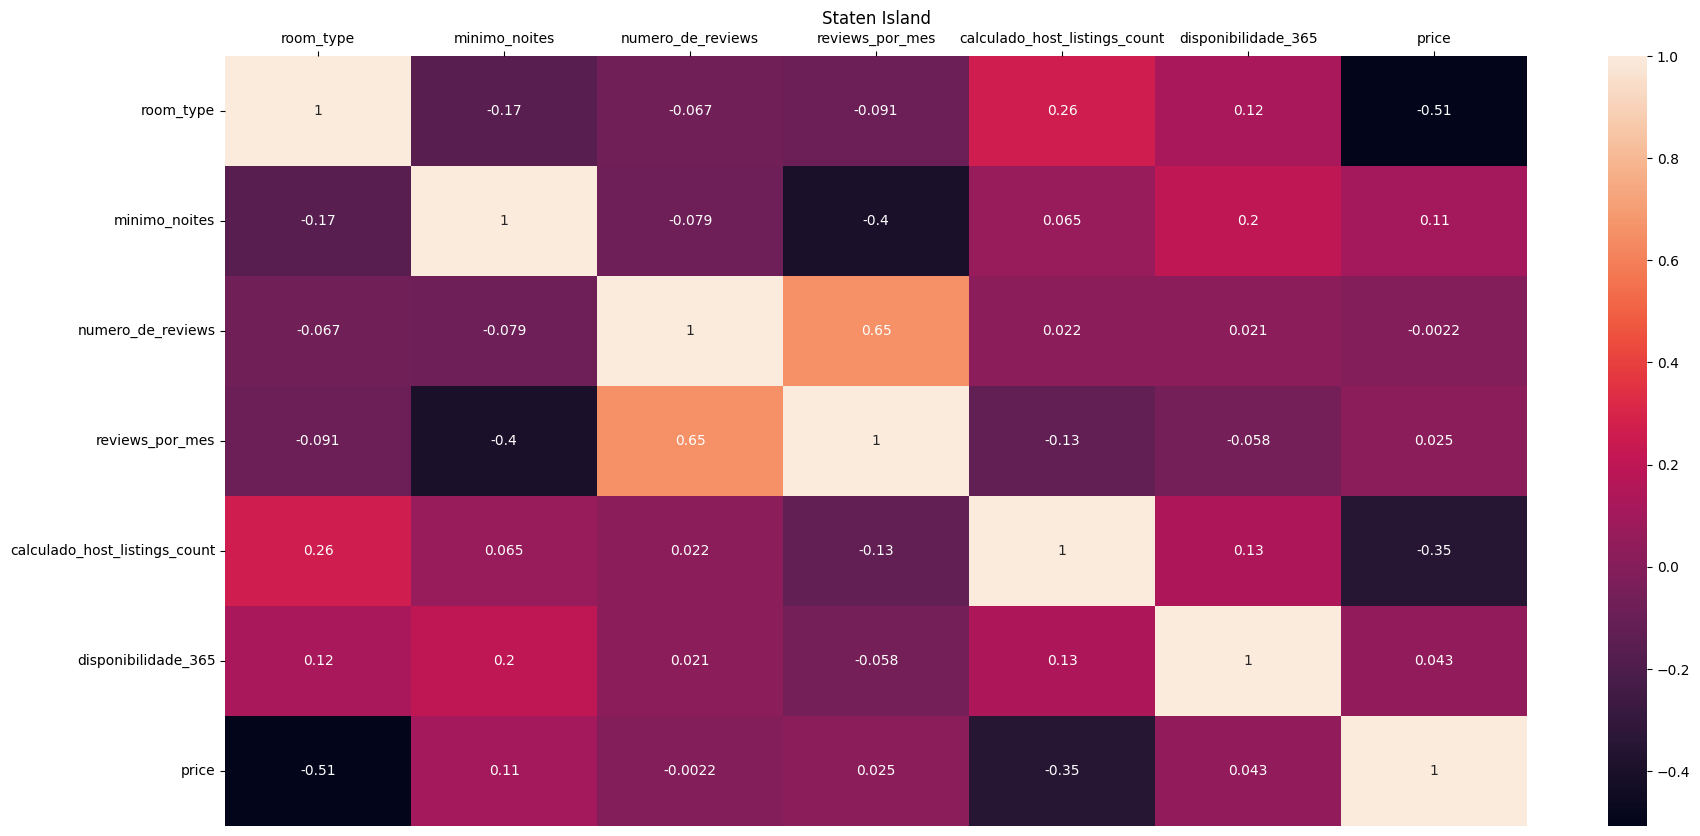

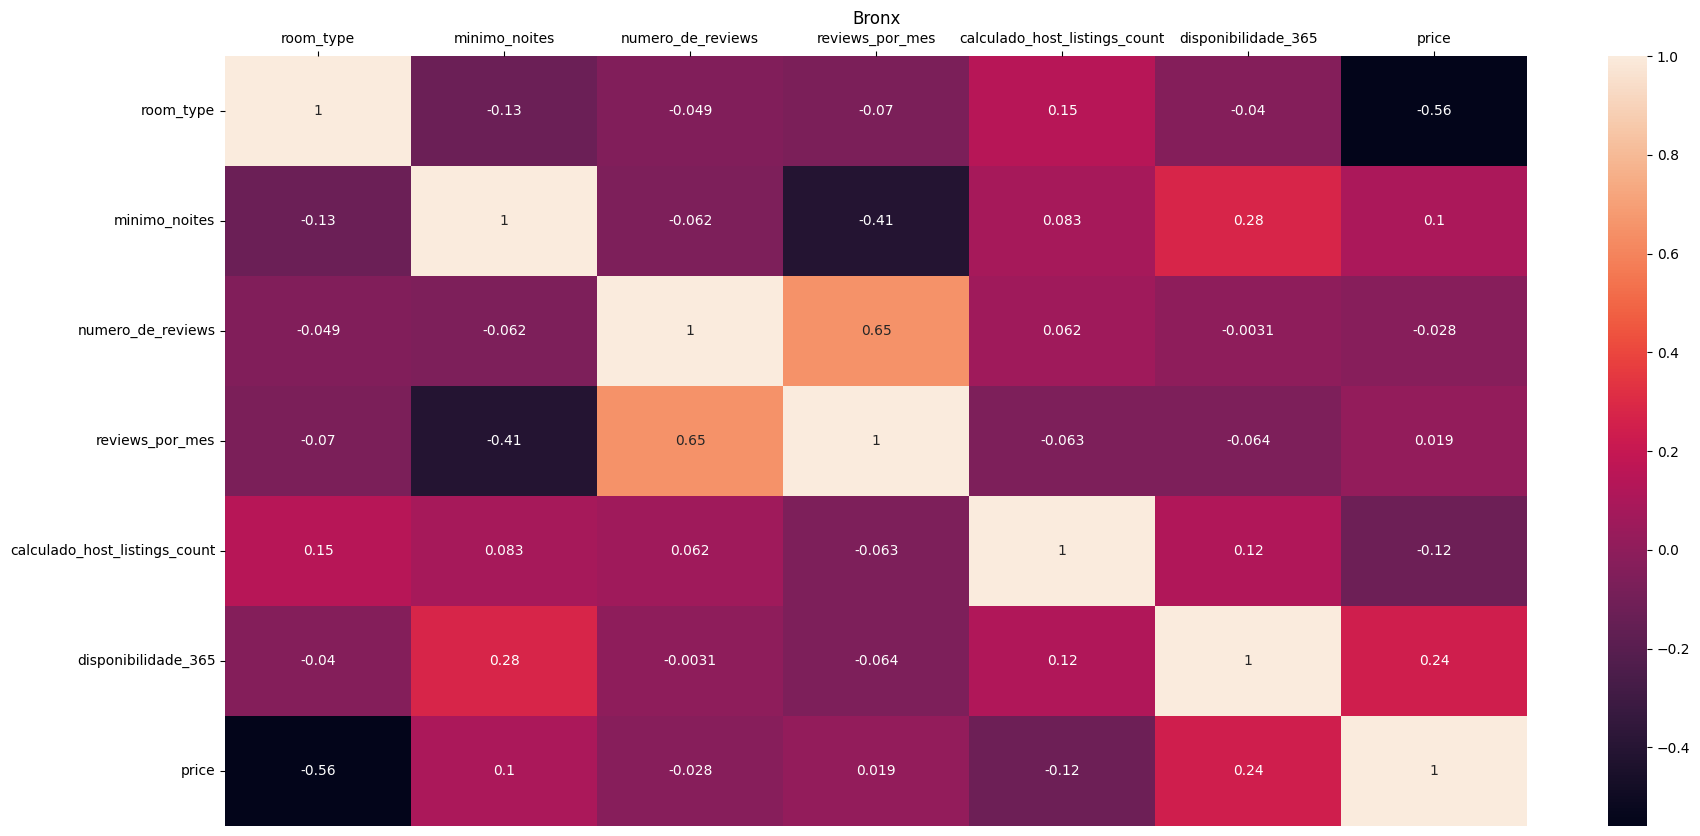

In [139]:
cols = ['room_type', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365', 'price']

for b in df_corr.bairro_group.unique():
  plt.figure(figsize=(21,10))
  hm = sns.heatmap(df_corr.loc[(df_corr.bairro_group==b),cols].corr(method='spearman'), annot=True)
  hm.set(xlabel="", ylabel="", title=bg_cats[b])
  hm.xaxis.tick_top()
  plt.show()

Parece que o tipo de espaço a ser alugado continua sendo o atributo com maior relação direta com o preço do aluguel, em todos os burgos.

Também pode-se destacar que o 2º atributo mais correlacionado com o preço varia entre burgos. Em Manhattan e Bronx, este atributo é a disponibilidade_365, enquanto em Queens, Brooklyn e Staten Island, a 2ª variável mais correlacionada com o preço é calculado_host_listings_count.

Além disso, voltando para a questão da correlação entre longitude e preço do aluguel mencioanada anteriormente; se formos verificar os scatterplots abaixo, é indicados que bairros com imóveis potencialmente mais caros são os mais centrais longitudalmente, como Manhattan e Brooklyn.

<Axes: xlabel='longitude', ylabel='latitude'>

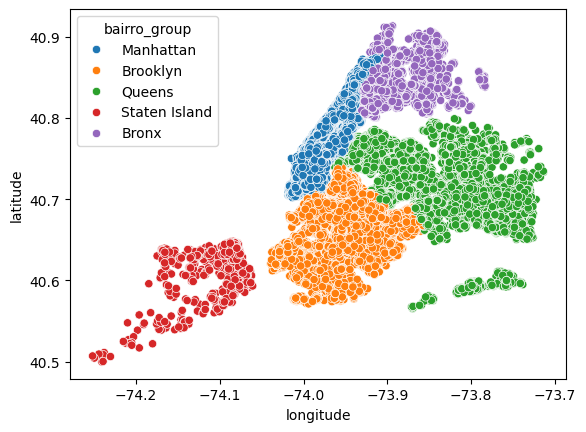

In [26]:
#viridis = palette=sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(df, x='longitude', y='latitude', hue='bairro_group')#hue='price', linewidth=0.1, palette=viridis)

<Axes: xlabel='longitude', ylabel='price'>

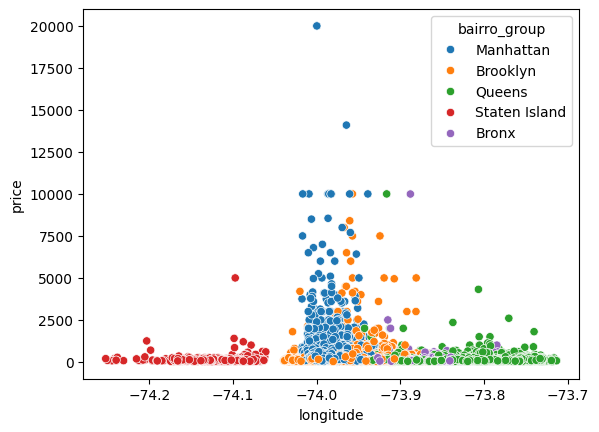

In [146]:
sns.scatterplot(df, y='price', x='longitude', hue='bairro_group')

Interessante Manhattan e Bronx mostrarem a maior disparidade nos preços de aluguel, já que são vizinhos e estão na mesma ilha.

### room_type x price

Como visto anteriormente, a variável room_type é a mais correlacionada com o preço do aluguel. O diagrama de caixas abaixo mostra uma descrição mais detalhada da distribuição dos preços com base no tipo de espaço a ser alugado:

In [35]:
df['room_type'].value_counts()

room_type
Entire home/apt    35486
Private room       30326
Shared room         1367
Hotel room           354
Name: count, dtype: int64

<Axes: ylabel='price'>

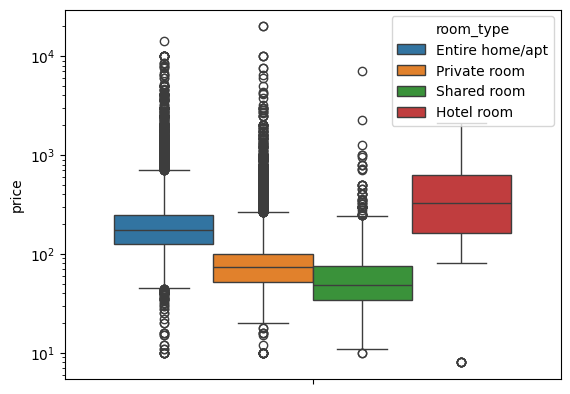

In [143]:
sns.boxplot(df, y='price', hue='room_type', log_scale=True)

O diagrama é bem claro e faz sentido. 

Quartos de hotéis costumam ser mais caros, já que providenciam o cliente com serviços adicionais e uma estrutura mais profissional, e por vezes luxuosa. Também é interessante que essa distribuição tem pouquíssimos outliers, diferentemente dos outros tipos de espaços, que pode ser explicado pelo pela similaridade maior entre quartos de hotéis diferentes, comparado a quartos privados, que podem variar muito mais em termos de qualidade e espaço. A quantidade de outliers também pode ser explicado pela quantidade pequena de instâncias dessa categoria, quando comparado às outras.

Em seguida, o tipo de espaço normalmente mais caro é de uma casa ou apartamento completo, que também é explicado pelo tamanho do espaço ou a localização.

Já os quartos privados possuem o maior intervalo entre o maior e o menor preço entre as categorias, e mesmo assim, a mediana dos preços tende a ficar abaixo de $100.

Por último, os quartos compartilhados tendem a serem os mais econômicos, tendo os preços de aluguel concentrados abaixo de $100, o que é esperado de um tipo de quarto em que múltiplos hóspedes diferentes acabam dividindo o aluguel. Assim sendo ideal para aqueles que procuram economizar ao máximo em sua hospedagem.

### bairro

In [85]:
df['bairro'].nunique()

224

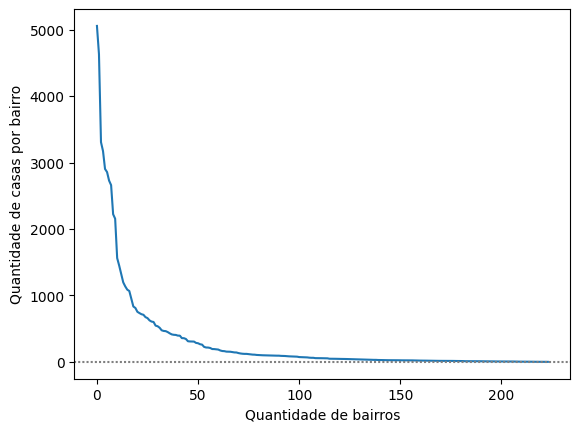

In [115]:
#sns.histplot(df['bairro']) histograma não dá certo pela quantidade de bairros
houses_per_neighborhood =  df['bairro'].value_counts().values
sns.lineplot(houses_per_neighborhood)
plt.axline((0, 0), slope=0, color='gray', dashes=[1,1])
#plt.axline((0, 0), slope=10000000, color='gray', dashes=[1,1])
plt.ylabel('Quantidade de casas por bairro')
plt.xlabel('Quantidade de bairros')
plt.show()

Como muitos bairros possuem um número muito pequeno de imóveis disponíveis, a 1a coisa que pensei em fazer seria o oversampling de instâncias desses bairros, mas não posso fazer isso porque implicaria mexer no test set diretamente ou indiretamente. Não posso fazer oversampled no dataset inteiro porque alteraria diretamente o test set, também não posso colocar instâncias oversampled no train set, e as originais no test set, porque isso significaria treinar indiretamente com instâncias do test set. 

Também pensei em pegar um dataset com todos os bairros de Nova York, para tornar o atributo 'bairro' no dataset em números inteiros com base nesses dados indepentendea, mas como os bairros não são localizações oficiais e bem delimitadas, elas vão mudando com o passar do tempo, assim como seu nome. Certos bairros também possuem abreviações diferentes, e que iria gastar muito tempo para fazer isso manualmente.

O que me resta é confiar nas capacidades extrapolativas do modelo.

### minimo_noites x price

<Axes: xlabel='minimo_noites', ylabel='price'>

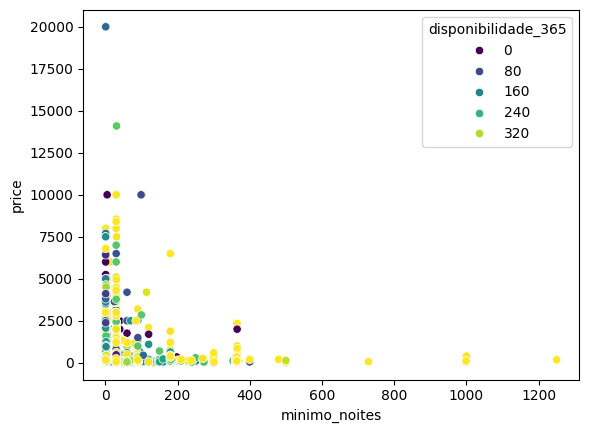

In [16]:
viridis = palette=sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(df, x='minimo_noites', y='price', hue='disponibilidade_365', palette=viridis)#, linewidth=0.1, palette=viridis)

Isso na verdade faz sentido, já que imóveis muito caros não precisa impor um número alto de noites mínimas para gerar lucro e passar um bom tempo sem novos inquilinos, enquanto um imóvel mais barato precise que as pessoas paguem uma certa quantidade de diárias para que possam lucrar. 

<Axes: xlabel='disponibilidade_365', ylabel='minimo_noites'>

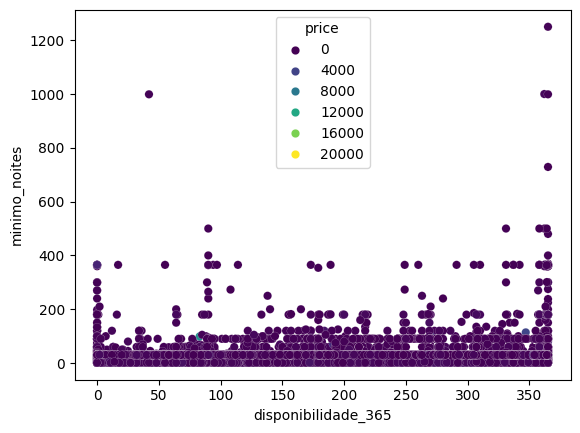

In [30]:
viridis = palette=sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(df, x='disponibilidade_365', y='minimo_noites', hue='price', linewidth=0.1, palette=viridis)

### disponibilidade_365 x price

<Axes: xlabel='disponibilidade_365', ylabel='price'>

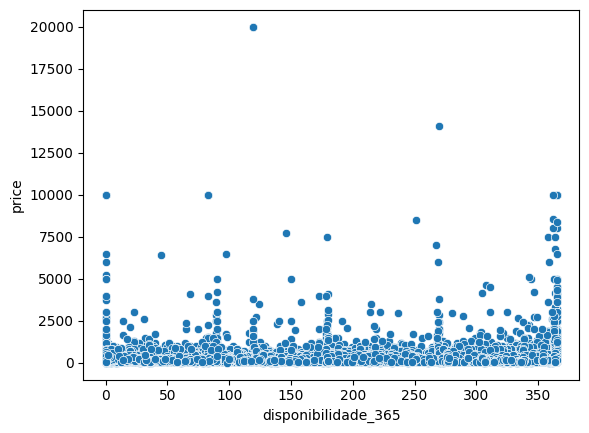

In [31]:
#viridis = palette=sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(df, x='disponibilidade_365', y='price')#, linewidth=0.1, palette=viridis)

In [17]:
df[['minimo_noites', 'disponibilidade_365', 'price']].corr('spearman')

,minimo_noites,disponibilidade_365,price
minimo_noites,1.000000,0.348405,0.073054
disponibilidade_365,0.348405,1.000000,0.144749
price,0.073054,0.144749,1.000000


Apesar de haver uma correlação fraca entre o mínimo de noites, e a disponibilidade do espaço ao longo do ano, ambos possuem uma correlação muito fraca com o preço do imóvel.

Mesmo assim, parece que imóveis com disponibilidade próxima de 365 ou próxima de 0 podem ser potencialmente mais caros, do que com outros valores de disponibilidade.

## Manipulação do dataset

In [19]:
X = df.drop(columns=['price', 'id', 'nome', 'host_id', 'host_name'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

As variáveis:

- id
- nome
- host_id
- host_name

Foram retiradas por não possuírem valor preditivo para o modelo. Além disso, foi testado o treinamento após a remoção das variáveis:

- latitude
- longitude

Porém o desempenho dos modelos preditivos caiu, então foram adicionas novamente.

In [20]:
# transformando em coluna categórica
X_train['room_type'] = X_train['room_type'].astype('category')
X_train['bairro_group'] = X_train['bairro_group'].astype('category')

# guardando as categorias para a transformação no test set
rt_cats = X_train['room_type'].cat.categories
bg_cats = X_train['bairro_group'].cat.categories

# transformando em números inteiros
X_train['room_type'] = X_train['room_type'].cat.codes
X_train['bairro_group'] = X_train['bairro_group'].cat.codes

# mesma coisa, mas 'bairro' precisa ser separado para ter uma relação maior com o burgo a qual pertence
temp = X_train.sort_values(by='bairro_group').loc[:, ['bairro_group', 'bairro']]
br_cats = pd.Index(temp.drop_duplicates()['bairro'])
X_train['bairro'] = X_train['bairro'].apply(lambda x: br_cats.get_loc(x))

X_train.head()

,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
3067,2,104,40.74166,-73.99892,2,30,83,2017-10-23,1.20,1,282
40776,1,59,40.70404,-73.93348,2,3,3,2019-04-23,0.76,1,0
43600,2,113,40.73131,-74.00619,0,3,3,2019-05-20,1.14,1,19
17108,2,98,40.76646,-73.98649,0,30,0,NaN,NaN,49,365
3701,1,59,40.70949,-73.94221,0,1,0,NaN,NaN,1,0


In [21]:
# limpando valores nulos de reviews por mês
X_train['reviews_por_mes'] = X_train['reviews_por_mes'].fillna(0)

# por enquanto só estou mudando para o ano da última review, mas talvez também adicione o ano
X_train['ultima_review'] = X_train['ultima_review'].apply(lambda x: int(x[:4]) if type(x)==str else x)
fill_review = X_train.loc[:, 'ultima_review'].median() # qualquer que seja a decisão aqui, vai impactar bastante o treinamento, 
# pois são cerca de 16000 instâncias que possuem esse valor nulo (min=2011 e mediana=2019)
X_train['ultima_review'] = X_train['ultima_review'].fillna(fill_review) # trocando valores nulos pelo valor mínimo do ano da ultima review

X_train.head()

,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
3067,2,104,40.74166,-73.99892,2,30,83,2017.0,1.20,1,282
40776,1,59,40.70404,-73.93348,2,3,3,2019.0,0.76,1,0
43600,2,113,40.73131,-74.00619,0,3,3,2019.0,1.14,1,19
17108,2,98,40.76646,-73.98649,0,30,0,2019.0,0.00,49,365
3701,1,59,40.70949,-73.94221,0,1,0,2019.0,0.00,1,0


In [22]:
# aplicando as mesmas transformações separadamente no test set
# transformando variáveis categóricas em inteiros
X_test['room_type'] = X_test['room_type'].apply(lambda x: rt_cats.get_loc(x))
X_test['bairro_group'] = X_test['bairro_group'].apply(lambda x: bg_cats.get_loc(x))
X_test['bairro'] = X_test['bairro'].apply(lambda x: br_cats.get_loc(x) if x in br_cats else len(br_cats)//2)
    # os bairros que não estavam presente no set de treinamento na hora da numeralização da coluna, recebem o índice mediano da lista de bairros

# limpando valores nulos de reviews por mês
X_test['reviews_por_mes'] = X_test['reviews_por_mes'].fillna(0)

# por enquanto só estou mudando para o ano da última review, mas talvez também adicione o ano
X_test['ultima_review'] = X_test['ultima_review'].apply(lambda x: int(x[:4]) if type(x)==str else x)
X_test['ultima_review'] = X_test['ultima_review'].fillna(fill_review) # trocando valores nulos

X_test.head()

,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
57147,2,117,40.734300,-73.985090,0,30,5,2024.0,0.18,22,310
55303,2,109,40.771984,-73.954514,0,30,11,2024.0,0.27,120,346
22596,2,98,40.753830,-73.997330,3,4,0,2019.0,0.00,1,0
30590,2,103,40.748250,-73.988530,0,1,3,2019.0,0.51,17,200
44694,3,142,40.747020,-73.956760,0,30,0,2019.0,0.00,1,0


In [24]:
# Remoção de outliers extremos
X_train = X_train[(y_train<500) & (y_train>50)]
y_train = y_train[(y_train<500) & (y_train>50)]

Esses outliers foram retirados para impedir que sua inclusão impactasse negativamente o treinamento do modelo, pois essas instâncias não são representativas do conjunto de dados.

## Treinamento e teste de modelos de ML

In [33]:
NUM_ITER = 200

logging:

In [25]:
logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

# set the experiment id
#mlflow.set_experiment(experiment_name="Projeto_CD")

funções:

In [31]:
def getMetrics(test, pred):
    rmse = root_mean_squared_error(test, pred)
    mse = mean_squared_error(test, pred)
    mae = mean_absolute_error(test, pred)

    return rmse, mse, mae

def mlflow_log(model, train:list|tuple, test:list|tuple, cv_score:float, model_params:dict, model_reg:str, model_tag:str):
    with mlflow.start_run() as run:
        # rmse, mse e mae           (y)              (X)
        train_scores = getMetrics(train[1], model.predict(train[0]))
        test_scores = getMetrics(test[1], model.predict(test[0]))

        print(f'''
Params: {model_params}
CV Score: {cv_score}
        
        Train   |   Test
RMSE:  {train_scores[0]:.4f}\t|   {test_scores[0]:.4f}
MSE: {train_scores[1]:.4f}\t|   {test_scores[1]:.4f}
MAE:   {train_scores[2]:.4f}\t|   {test_scores[2]:.4f}''')
        mlflow.log_params(model_params)
        mlflow.log_metrics({'cross_val_score': cv_score,
                            "train_rmse": train_scores[0],
                            "train_mse": train_scores[1],
                            "train_mae": train_scores[2],
                            #"valid_rmse": valid_scores[0],
                            #"valid_mse": valid_scores[1],
                            #"valid_mae": valid_scores[2],
                            'test_rmse': test_scores[0],
                            'test_mse': test_scores[1],
                            'test_mae': test_scores[2],
                            })
        mlflow.set_tag('mdl', model_tag) # modelo

        run_id = run.info.run_id

        #tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        mlflow.sklearn.log_model(model, "model", registered_model_name=model_reg)

    return run_id

#### Random Forest

In [41]:
distributions = {'n_estimators': list(range(5, 101, 5)),
                 'max_depth': list(range(10, 151)),
                 'min_samples_split': list(range(100, 1000))} # randint()

rand_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                                distributions, cv=5, n_iter=NUM_ITER, 
                                random_state=42, n_jobs=-1, 
                                scoring='neg_mean_squared_error').fit(X_train, y_train)
rforest = rand_search.best_estimator_
print(f'''Params: {rand_search.best_params_}
CV score: {rand_search.best_score_}''')

rforest_best_id = mlflow_log(model=rforest,
                          train=(X_train, y_train),
                          #valid=(X_valid, y_valid),
                          test=(X_test, y_test),
                          cv_score=rand_search.best_score_,
                          model_params=rand_search.best_params_,
                          model_reg='RandomForest',
                          model_tag='rforest')


Params: {'n_estimators': 95, 'min_samples_split': 119, 'max_depth': 98}
CV Score: -4330.04278020505
        
        Train   |   Test
RMSE:  60.6678	|   346.8372
MSE: 3680.5864	|   120296.0464
MAE:   42.6962	|   74.4229


Successfully registered model 'RandomForest'.
Created version '1' of model 'RandomForest'.
2025/02/02 13:31:27 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


        Params: {'n_estimators': 20, 'min_samples_split': 137, 'max_depth': 104}
        CV score: -4386.431588453552
                Train   |   Test
        rmse  61.5728   |   346.9325
        mse 3791.2070   |   120362.1433
        mae   43.3187   |   74.6889

        Params: {'n_estimators': 95, 'min_samples_split': 119, 'max_depth': 98}
        CV score: -4330.04278020505
                Train   |   Test
        rmse  60.6678   |   346.8372
        mse 3680.5863   |   120296.0464
        mae   42.6962   |   74.4229

#### AdaBoost

In [ ]:
params = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] + list(range(1,10,1)),
                 'loss': ['linear', 'square', 'exponential']} # randint()

rand_search = GridSearchCV(AdaBoostRegressor(n_estimators=100, random_state=42), 
                                params, cv=5, #n_iter=NUM_ITER,
                                scoring='neg_mean_squared_error').fit(X_train, y_train)
ada = rand_search.best_estimator_
ada_best_id = mlflow_log(model=ada,
                          train=(X_train, y_train),
                          #valid=(X_valid, y_valid),
                          test=(X_test, y_test),
                          cv_score=rand_search.best_score_,
                          model_params=rand_search.best_params_,
                          model_reg='AdaBoost',
                          model_tag='ada')

Params: {'learning_rate': 0.1, 'loss': 'exponential'}
CV score: -6297.126485442712

Params: {'learning_rate': 0.1, 'loss': 'exponential'}
CV Score: -6297.126485442712
        
        Train   |   Test
RMSE:  79.2056	|   350.0217
MSE: 6273.5329	|   122515.2166
MAE:   65.1622	|   95.6458


Successfully registered model 'AdaBoost'.
Created version '1' of model 'AdaBoost'.
2025/02/02 13:50:34 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


        Train   |   Test
rmse  79.2056	|   350.0217
mse 6273.5329	|   122515.2166
mae   65.1622	|   95.6458


        Params: {'learning_rate': 0.1, 'loss': 'exponential'}
        CV score: -6297.126485442712
                Train   |   Test
        rmse  79.2056   |   350.0217
        mse 6273.5329   |   122515.2166
        mae   65.1622   |   95.6458

### XgBoost

In [183]:
early_stop = xgboost.callback.EarlyStopping(
    rounds=5, metric_name='rmse', data_name='validation_0', save_best=True
)

params = {'eta': [0.1,0.3,0.5,0.7,0.9],
    'gamma': [0, 3, 10, 30],
    'lambda': [0, 10],
    'n_estimators': [128, 512],
    'max_depth': [6, 20]} # randint()

FOLDS = 5
idxs = np.array_split(X_train.index, FOLDS)

count = 1
best_score = 0
for eta in params['eta']:
    for g in params['gamma']:
        for l in params['lambda']:
            for n in params['n_estimators']:
                for m in params['max_depth']:
                    score = 0
                    for i in range(FOLDS):
                        early_stop = xgboost.callback.EarlyStopping(
                        rounds=5, metric_name='rmse', data_name='validation_0', save_best=True
                        )
                        vmodel = XGBRegressor(tree_method='hist', 
                                        multi_strategy='one_output_per_tree', 
                                        n_jobs=None, eta=eta, gamma=g, reg_lambda=g, 
                                        n_estimators=n, max_depth=m, callbacks=[early_stop])
                        
                        X_i = X_train.loc[idxs[i],:]
                        y_i = y_train[idxs[i]]
                        vmodel = vmodel.fit(X_train.drop(idxs[i]), y_train.drop(idxs[i]), eval_set=[(X_i, y_i)], verbose=0)
                        score -= mean_squared_error(y_i, vmodel.predict(X_i))

                    #vmodel, score = xgcv(vmodel, X_train, y_train, folds=5)
                    
                    # Substituindo melhores scores e modelo:
                    if((score > best_score) or (best_score==0)):
                        best_score = score
                        xgb = vmodel
                        #k_best_id = run.info.run_id
                    print(f'{count}/160')
                    count += 1

xgb_best_id = mlflow_log(model=xgb,
                          train=(X_train, y_train),
                          #valid=(X_valid, y_valid),
                          test=(X_test, y_test),
                          cv_score=best_score,
                          model_params=xgb.get_params(),
                          model_reg='XGBBoost',
                          model_tag='xgb')

1/160
2/160
3/160
4/160
5/160
6/160
7/160
8/160
9/160
10/160
11/160
12/160
13/160
14/160
15/160
16/160
17/160
18/160
19/160
20/160
21/160
22/160
23/160
24/160
25/160
26/160
27/160
28/160
29/160
30/160
31/160
32/160
33/160
34/160
35/160
36/160
37/160
38/160
39/160
40/160
41/160
42/160
43/160
44/160
45/160
46/160
47/160
48/160
49/160
50/160
51/160
52/160
53/160
54/160
55/160
56/160
57/160
58/160
59/160
60/160
61/160
62/160
63/160
64/160
65/160
66/160
67/160
68/160
69/160
70/160
71/160
72/160
73/160
74/160
75/160
76/160
77/160
78/160
79/160
80/160
81/160
82/160
83/160
84/160
85/160
86/160
87/160
88/160
89/160
90/160
91/160
92/160
93/160
94/160
95/160
96/160
97/160
98/160
99/160
100/160
101/160
102/160
103/160
104/160
105/160
106/160
107/160
108/160
109/160
110/160
111/160
112/160
113/160
114/160
115/160
116/160
117/160
118/160
119/160
120/160
121/160
122/160
123/160
124/160
125/160
126/160
127/160
128/160
129/160
130/160
131/160
132/160
133/160
134/160
135/160
136/160
137/160
138/160
139/

Registered model 'XGBBoost' already exists. Creating a new version of this model...
Created version '2' of model 'XGBBoost'.
2025/02/02 22:00:40 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


In [188]:
# Para salvar o modelo:
joblib.dump(xgb, 'best_model_xgb.pkl') 

['best_model_xgb.pkl']

## Teste pedido na entrega:

(Basta executar todo código a partir daqui)

In [ ]:
# Importando apenas as bibliotecas necessárias 
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split

In [1]:
# Para usar o modelo:
model = joblib.load('best_model_xgb.pkl') 

Todas as alterações feitas no dataset, consendadas em um só bloco. Caso queira mais informações sobre como ou o por que algum trecho foi feito, é só voltar para sua origem mais acima.

In [2]:
df = pd.read_csv('teste_indicium_precificacao.csv')
df_new = pd.read_csv('listings.csv')

df_new.rename(columns={'name': 'nome', 
                       'neighbourhood_group': 'bairro_group', 
                       'neighbourhood': 'bairro',
                       'minimum_nights': 'minimo_noites',
                       'calculated_host_listings_count': 'calculado_host_listings_count',
                       'availability_365': 'disponibilidade_365',
                       'number_of_reviews': 'numero_de_reviews',
                       'last_review': 'ultima_review',
                       'reviews_per_month': 'reviews_por_mes'}, inplace=True) # trocando nomes das colunas para o merge
df_new = df_new.drop(index=df_new[df_new['price'].isna()].index, columns=['license', 'number_of_reviews_ltm'])

teste = pd.merge(df, df_new, how='inner', left_on='id', right_on='id')
lost_reviews = teste.loc[[389, 486, 2239, 3052], ['id', 'ultima_review_x', 'reviews_por_mes_y']].set_index('id')

df.set_index('id', inplace=True)
df_new.set_index('id', inplace=True)
# atualiza os dados antigos
df.update(df_new) 
# adiciona os novos dados e retira os usados na atualização
df = pd.concat([df, df_new.drop(index=lost_reviews.index)]) 
# se não tirar aquelas reviews "perdidas", elas não vão ser consideradas duplicatas a serem retiradas
df.reset_index(inplace=True)  # to recover the initial structure
df = df.drop_duplicates() # tira duplicatas

X = df.drop(columns=['price', 'id', 'nome', 'host_id', 'host_name'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# transformando em coluna categórica
X_train['room_type'] = X_train['room_type'].astype('category')
X_train['bairro_group'] = X_train['bairro_group'].astype('category')

# guardando as categorias para a transformação no test set
rt_cats = X_train['room_type'].cat.categories
bg_cats = X_train['bairro_group'].cat.categories

# transformando em números inteiros
X_train['room_type'] = X_train['room_type'].cat.codes
X_train['bairro_group'] = X_train['bairro_group'].cat.codes

# mesma coisa, mas 'bairro' precisa ser separado para ter uma relação maior com o burgo a qual pertence
temp = X_train.sort_values(by='bairro_group').loc[:, ['bairro_group', 'bairro']]
br_cats = pd.Index(temp.drop_duplicates()['bairro'])
X_train['bairro'] = X_train['bairro'].apply(lambda x: br_cats.get_loc(x))
# limpando valores nulos de reviews por mês
X_train['reviews_por_mes'] = X_train['reviews_por_mes'].fillna(0)
# por enquanto só estou mudando para o ano da última review, mas talvez também adicione o ano
X_train['ultima_review'] = X_train['ultima_review'].apply(lambda x: int(x[:4]) if type(x)==str else x)
fill_review = X_train.loc[:, 'ultima_review'].median() # qualquer que seja a decisão aqui, vai impactar bastante o treinamento, 
# pois são cerca de 16000 instâncias que possuem esse valor nulo (min=2011 e mediana=2019)
X_train['ultima_review'] = X_train['ultima_review'].fillna(fill_review) # trocando valores nulos pelo valor mínimo do ano da ultima review

# aplicando as mesmas transformações separadamente no test set
# transformando variáveis categóricas em inteiros
X_test['room_type'] = X_test['room_type'].apply(lambda x: rt_cats.get_loc(x))
X_test['bairro_group'] = X_test['bairro_group'].apply(lambda x: bg_cats.get_loc(x))
X_test['bairro'] = X_test['bairro'].apply(lambda x: br_cats.get_loc(x) if x in br_cats else len(br_cats)//2)
    # os bairros que não estavam presente no set de treinamento na hora da numeralização da coluna, recebem o índice mediano da lista de bairros

# limpando valores nulos de reviews por mês
X_test['reviews_por_mes'] = X_test['reviews_por_mes'].fillna(0)

# por enquanto só estou mudando para o ano da última review, mas talvez também adicione o ano
X_test['ultima_review'] = X_test['ultima_review'].apply(lambda x: int(x[:4]) if type(x)==str else x)
X_test['ultima_review'] = X_test['ultima_review'].fillna(fill_review) # trocando valores nulos

# Remoção de outliers extremos
X_train = X_train[(y_train<500) & (y_train>50)]
y_train = y_train[(y_train<500) & (y_train>50)]

Aqui o modelo irá rodar um exemplo que você escolher baseado nas informações dadas:

In [3]:
example = pd.DataFrame({'id': [2595],
        'nome': ['Skylit Midtown Castle'],
        'host_id': [2845],
        'host_name': ['Jennifer'],
        'bairro_group': ['Manhattan'],
        'bairro': ['Midtown'],
        'latitude': [40.75362],
        'longitude': [-73.98377],
        'room_type': ['Entire home/apt'],
        'minimo_noites': [1],
        'numero_de_reviews': [45],
        'ultima_review': ['2019-05-21'],
        'reviews_por_mes': [0.38],
        'calculado_host_listings_count': [2],
        'disponibilidade_365': [355]})

example = example.drop(columns=['id', 'nome', 'host_id', 'host_name'])

example['room_type'] = example['room_type'].apply(lambda x: rt_cats.get_loc(x))
example['bairro_group'] = example['bairro_group'].apply(lambda x: bg_cats.get_loc(x))
example['bairro'] = example['bairro'].apply(lambda x: br_cats.get_loc(x) if x in br_cats else len(br_cats)//2)

example['ultima_review'] = example['ultima_review'].apply(lambda x: int(x[:4]) if type(x)==str else x)

print(f'Preço previsto: ${model.predict(example)[0]:.2f}')

Preço previsto: $247.54


|Melhor|

- Random Forest = 250.47
- AdaBoost = 254.28
- XGBoost = 247.54

### Sobre o melhor modelo:

O melhor modelo treinado foi o XGBoost (Extreme Gradient Boosting), um tipo de modelo conhecido pela sua eficiência e desempenho em paralelo. Além de ser um modelo que vêm adquirindo vários resultados em competições de Machine Learning (como do Kaggle), ele também possui algoritmos melhores de poda da árvores, do que outros algoritmos. Porém um dos seus pontos negativos é o custo computacional, que pode ser especialmente alto ao treinar com grandes quantidades de dados.

Apesar da medida escolhida para a comparação das performances entre os modelos ter sido a RMSE (Root Mean Squared Error), por apresentar o erro em uma unidade de medida semelhante a dos dados originais; o modelo XGBoost ultrapassou os outros modelos em todas as outras métricas utilizadas, sendo elas o MSE (Mean Squared Error), escolhido por normalmente ser utilizado como função de perda durante o treinamento dos modelos, e MAE (Mean Absolute Error), escolhido por ser a mesma unidade de medida do que a dos dados originais.